In [12]:
%matplotlib widget
%load_ext autoreload
%autoreload 2
# %matplotlib inline

import numpy as np
import sys
import commpy
import struct
import matplotlib.pyplot as plt
import scipy

# import matlab.engine
# eng = matlab.engine.start_matlab()

from LoRaDecoder import LoRaDecoder



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(512,)
(512,)
None


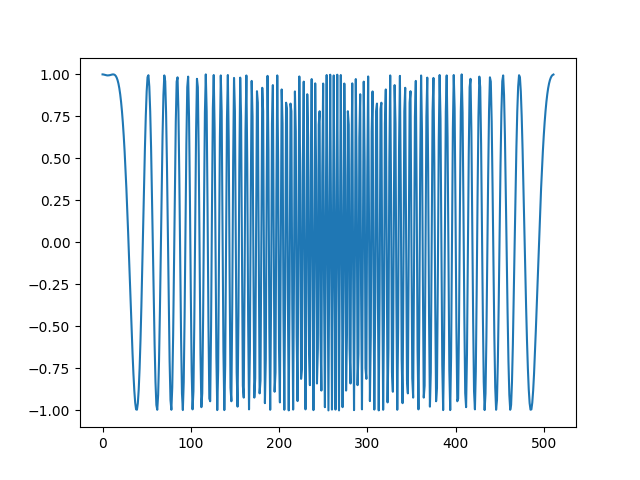

In [3]:
rf_freq = 915e6    # carrier frequency 470 MHz, used to correct clock drift
sf = 8             # spreading factor SF7
bw = 125e3         # bandwidth 125 kHz
fs = 250e3         # sampling rate 1 MHz

phy = LoRaDecoder()



uc = phy.chirp(True,sf,bw,fs,125,0,0)


plt.figure()
plt.plot(np.real(uc))
print(uc.shape)


dc = phy.chirp(False,sf,bw,fs,1,0,0)
print(print(dc.shape))


(1, 142987)


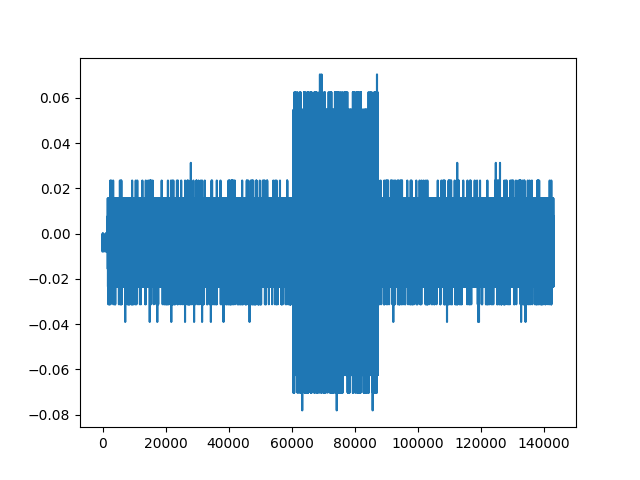

In [4]:
fileName = './EE595 Project Data/dataSF8CR8packet1.bin'

raw = phy.read_complex(fileName)

print(raw.shape)


plt.figure()
plt.plot(np.real(raw.T))
plt.show()

(142987,)
(4096,)
(-0.007836431645097258+0.007788494820677373j)


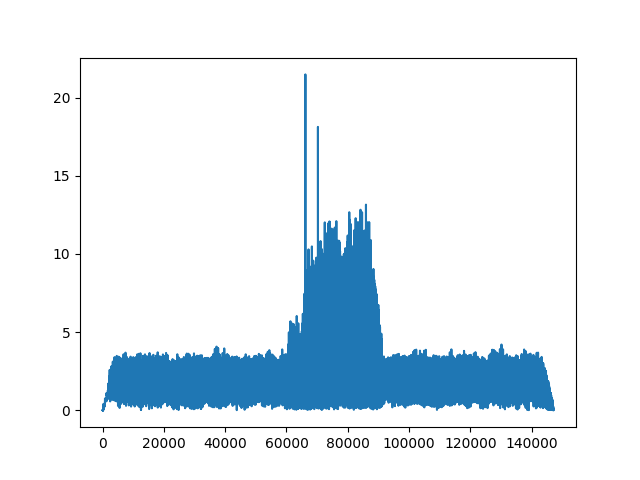

In [151]:
fileName = './EE595 Project Data/dataSF8CR8packet1.bin'



rf_freq = 915e6    # carrier frequency 470 MHz, used to correct clock drift
sf = 8             # spreading factor SF7
bw = 125e3         # bandwidth 125 kHz
fs = 250e3         # sampling rate 1 MHz
preamble_len = 8

phy = LoRaDecoder()

raw = phy.read_complex(fileName)

uc = phy.chirp(True, sf, bw, fs, 0, 0, 0)
dc = phy.chirp(False, sf, bw, fs, 0, 0, 0)

import numpy.matlib

raw = raw
preamble = np.matlib.repmat(dc, 1, preamble_len).flatten()


print(raw.shape)
print(preamble.shape)
res = np.correlate(raw, preamble, 'full')

print(res[0])

plt.figure()
plt.plot(abs(res))
plt.show()

In [1]:
# eng.cd('C:\Workspace\Courses\ee595hws\hw1\EE595 Project Data')
# eng.pwd()


# Whitening

```matlab
% The whitening sequence is generated by an LFSR
% x^8+x^6+x^5+x^4+1
% Use the code below to generate such sequence
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
% reg = 0xFF;
% for i = 1:255
%     fprintf("0x%x, ", reg);
%     reg = bitxor(bitshift(reg,1), bitxor(bitget(reg,8), bitxor(bitget(reg,6), bitxor(bitget(reg,5), bitget(reg,4)))));
% end
```

In [103]:
print(0xFF)
print(np.bitwise_xor(0xFF, 0x01))
print(bin(np.bitwise_xor(0xFF, 0x01)))
print(bin(0x01 >> 1))
print(bin(0x01 << 1))

# inverse of xor is xor (order doesn't matter)
# c = xor(a,b) => b = xor(a,c)

a = np.random.randint(0,255)
b = np.random.randint(0,255)
print(bin(a),bin(b), type(a), type(hex(a)))
c = np.bitwise_xor(a,b)
d = np.bitwise_xor(c,a)
f = np.bitwise_xor(c,b)

print(bin(c))
print(bin(d), d==b)
print(bin(f), f==a)

c = a^b
d = c^a
e = c^b
print(bin(c))
print(bin(d), d==b)
print(bin(f), f==a)

255
254
0b11111110
0b0
0b10
0b1000000 0b11111 <class 'int'> <class 'str'>
0b1011111
0b11111 True
0b1000000 True
0b1011111
0b11111 True
0b1000000 True


In [150]:
print(phy.whitening_seq)

reg = np.uint8(0xff)
print(bin(reg))
print(bin(reg<<1))
print(bin(reg<<np.uint8(1)))

print(bin(np.left_shift(reg,1)))
print(bin(np.left_shift(reg,np.uint8(1))))


def getbit(data, n):
    return (data >> np.uint8(n-1)) & np.uint8(1)

# reg = np.uint8(0b10000000)
# print(bin(reg))
# for i in range(8):
#     print(getbit(reg,i+1))

print(type(reg))
print(type(getbit(reg,1)))

# reg = np.uint8(0xff)

def gen_whitening_seq(reg, num):
    seq = []
    for i in range(num):
        seq.append(reg)
        reg = (reg<<np.uint8(1)) ^ (getbit(reg,8) ^ (getbit(reg,6) ^ getbit(reg,5) ^ getbit(reg,4)))
    return np.array(seq).astype(np.uint8)

# for i in range(256):
#     print(type(reg))
#     print(reg)
#     print((reg<<np.uint8(1)))
#     print((getbit(reg,8) ^ (getbit(reg,6) ^ getbit(reg,5) ^ getbit(reg,4))))
#     reg = (reg<<np.uint8(1)) ^ (getbit(reg,8) ^ (getbit(reg,6) ^ getbit(reg,5) ^ getbit(reg,4)))

seq = gen_whitening_seq(np.uint8(0xff),255)

print(seq)
print(len(seq))
print(type(seq), type(seq[0]))
print(type(phy.whitening_seq), type(phy.whitening_seq[0]))
print(all(seq == phy.whitening_seq))

    

[255 254 252 248 240 225 194 133  11  23  47  94 188 120 241 227 198 141
  26  52 104 208 160  64 128   1   2   4   8  17  35  71 142  28  56 113
 226 196 137  18  37  75 151  46  92 184 112 224 192 129   3   6  12  25
  50 100 201 146  36  73 147  38  77 155  55 110 220 185 114 228 200 144
  32  65 130   5  10  21  43  86 173  91 182 109 218 181 107 214 172  89
 178 101 203 150  44  88 176  97 195 135  15  31  62 125 251 246 237 219
 183 111 222 189 122 245 235 215 174  93 186 116 232 209 162  68 136  16
  33  67 134  13  27  54 108 216 177  99 199 143  30  60 121 243 231 206
 156  57 115 230 204 152  49  98 197 139  22  45  90 180 105 210 164  72
 145  34  69 138  20  41  82 165  74 149  42  84 169  83 167  78 157  59
 119 238 221 187 118 236 217 179 103 207 158  61 123 247 239 223 191 126
 253 250 244 233 211 166  76 153  51 102 205 154  53 106 212 168  81 163
  70 140  24  48  96 193 131   7  14  29  58 117 234 213 170  85 171  87
 175  95 190 124 249 242 229 202 148  40  80 161  6

In [165]:
phy = LoRaDecoder(sf=8)

data = np.arange(1,8).astype(np.int8)

print(data)
print(phy.whiten(data))
# print()
print(type(data[0]))

print(phy.whiten(phy.whiten(data)))
print(type(phy.whiten(phy.whiten(data))[0]))

[1 2 3 4 5 6 7]
[254 252 255 252 245 231 197]
<class 'numpy.int8'>
[1 2 3 4 5 6 7]
<class 'numpy.uint8'>


## nibble to byte

In [207]:

data_nibble = np.array([0xE, 0xF, 0xC, 0xF, 0xF, 0xF], dtype=np.uint8)
data_original = np.array([0xfe, 0xfc, 0xff], dtype=np.uint8)

print(hex(data_nibble[1] << np.uint8(4)))
print(hex(data_nibble[0]))
print(data_nibble[1] << np.uint8(4) + data_nibble[0])

print(type(data_nibble[1]<<np.uint8(4)))
print(type(data_nibble[0]))
print(type(data_nibble[1]<<np.uint8(4) + data_nibble[0]))

print((data_nibble[1]<<np.uint8(4)) + data_nibble[0])
print(np.uint8(240) + np.uint8(14))

print((1<<4) + 1)

print('original', [hex(x) for x in data_original])
print(data_original)

# potentially '+' is faster than '|'
data_byte = np.array([(data_nibble[2*i+1]<<np.uint8(4))+data_nibble[2*i] for i in range(len(data_nibble)//2)], dtype=np.uint8)
# data_byte = np.array([(data_nibble[2*i+1]<<np.uint8(4))|data_nibble[2*i] for i in range(len(data_nibble)//2)], dtype=np.uint8)


print(data_nibble)
print(data_byte)
print(type(data_byte[0]))

0xf0
0xe
0
<class 'numpy.uint8'>
<class 'numpy.uint8'>
<class 'numpy.uint8'>
254
254
17
original ['0xfe', '0xfc', '0xff']
[254 252 255]
[14 15 12 15 15 15]
[254 252 255]
<class 'numpy.uint8'>


## Hamming code

In [241]:
data_nibble = np.array([0xE, 0xF, 0xC, 0xF, 0xF, 0xF], dtype=np.uint8)

nibble = data_nibble[0]

print(bin(nibble))
print(np.unpackbits(nibble))
print(np.unpackbits(nibble)[-4:])
[d1,d2,d3,d4] = np.unpackbits(nibble)[-4:]

print(d1,d2,d3,d4)
print(type(d1))


b = np.packbits([0,0,0,0,0,0,0,1])

print(b)
print(type(b))
print(type(b[0]))

print(bin(1<<4))

print(bin(1<<7))

0b1110
[0 0 0 0 1 1 1 0]
[1 1 1 0]
1 1 1 0
<class 'numpy.uint8'>
[1]
<class 'numpy.ndarray'>
<class 'numpy.uint8'>
0b10000
0b10000000


In [246]:
phy = LoRaDecoder(sf=8)

data_nibble = np.array([0xE, 0xF, 0xC, 0xF, 0xF, 0xF], dtype=np.uint8)

hamming = phy.hamming_encode(data_nibble)

print(bin(phy.hamming_nibble(np.uint8(0xF), 8)))


print([bin(x) for x in hamming])

0b11111111
['0b101110', '0b11111111', '0b1011100', '0b11111111', '0b11111111', '0b11111111']
